> # Ensemble learning #
#### If we gether some predictions from several models, we will be able to get a prediction better than prediction of one best model. We call this method ensemble method. ####

## 1. Voting ##
#### The simplest way to create a better classification model is to collect predictions for each classifier and select the most voted class. This method is called hard voting. ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_moons
np.random.seed(120)

X, Y = make_moons(n_samples = 1000, noise = 0.3)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logis = LogisticRegression(solver = 'lbfgs')
svm = SVC(gamma='scale', probability=True)
ranfo = RandomForestClassifier(n_estimators=100)

vot = VotingClassifier(estimators=[('lr', logis), ('svc', svm), ('randomfo', ranfo)])

vot.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('randomfo', RandomForestClassifier())])

In [5]:
from sklearn.metrics import accuracy_score
for clf in (logis, svm, ranfo, vot):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_pred, y_test))

LogisticRegression 0.87
SVC 0.915
RandomForestClassifier 0.915
VotingClassifier 0.905


#### Soft voting method is gathering probabilities of a class drived from each classifier. This method is known better than hard voting method. ####

In [6]:
vot_soft = VotingClassifier(estimators=[('lr', logis), ('svc', svm), ('randomfo', ranfo)], voting= 'soft',)

vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.915


## 2. Bagging and Pasting ##
#### Different from voting(using several different algorithm), using one algorithm with different data subset can be also another ensemble method. One is Bagging which allows duplication sampling from train data. And the other is Pasting which doesn't allow duplication. First, it samples data from train dataset and makes some subdatasets. And models(same algorithm) trains each subdataset. If this process ends, ensemble gather each predict from the models and makes new predict of new sample (statistical mode at classification, mean at regression) ####

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500, max_samples= 100, bootstrap= True, n_jobs= -1)
bag.fit(X_train, y_train)

deci = DecisionTreeClassifier()
deci.fit(X_train, y_train)

y_pred = bag.predict(X_test)
accuracy_score(y_pred, y_test)

0.915

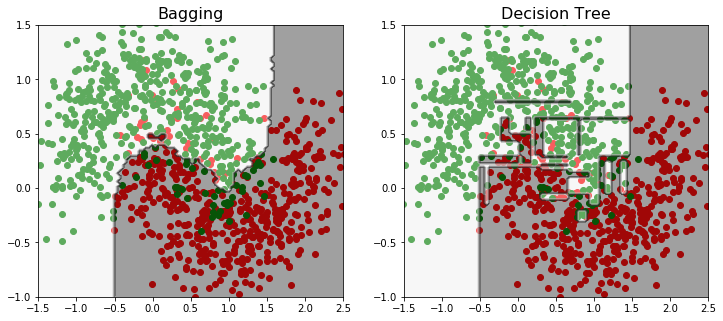

In [8]:
x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_im = np.c_[x0.flatten(),x1.flatten()]

y_pred1 = bag.predict(X_im)
y_pred2 = deci.predict(X_im)


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.axis([-1.5,2.5, -1, 1.5]); ax1.set_title("Bagging", fontsize=16)
ax1.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax1.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')
ax1.contourf(x0, x1, y_pred1.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.4)


ax2.axis([-1.5,2.5, -1, 1.5]); ax2.set_title("Decision Tree", fontsize=16)
ax2.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
ax2.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')
ax2.contourf(x0, x1, y_pred2.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.4)

#### Since bootstraping increases variety of train subsets, bagging is more biased than pasting. However, adding variety reduces coefficient among models. So It reduces ensemble's variance. ####
#### When we use bagging a data is sampled frequently but a data can never be sampled. About 63% of train data are sampled. 37% leftover data is called oob smple. Oob sample is not used during training, seperate validation set isn't needed. Mean of each model's oob score is score of ensemble. ####

In [9]:
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500, max_samples= 100, bootstrap= True, n_jobs= -1,
                       oob_score = True)
bag.fit(X_train, y_train)
bag.oob_score_

0.89625

In [10]:
bag.oob_decision_function_

array([[0.06306306, 0.93693694],
       [0.90358744, 0.09641256],
       [0.00886918, 0.99113082],
       ...,
       [0.09111617, 0.90888383],
       [0.0248307 , 0.9751693 ],
       [0.12114014, 0.87885986]])

#### 'Random patched method' is to sample both train features and sample. ####
#### Using all train sample**(bootstrap= False, max_samples= 1)** and sampling features**(bootstrap_features= True, max_features< 1)** is called 'random subspaces method'. ####

## 3. RandomForest ##
#### Randomforest is ensemble of decision tree applied bagging. **max_sample** is setted as size of train set. Randomforest adds randomness by searching best feature among randomly selceted several features(instead all features). It makes trees more various and reduces variance(but increases bias). ####

In [11]:
rnd = RandomForestClassifier(n_estimators= 500, max_leaf_nodes= 16, n_jobs= -1)
rnd.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

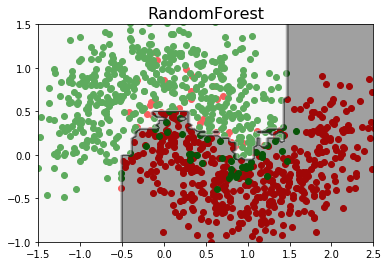

In [12]:
y_pred = rnd.predict(X_im)

plt.axis([-1.5,2.5, -1, 1.5]); plt.title("RandomForest", fontsize=16)
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
plt.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')
plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.4)

#### Another advantage of randomforest is it's easy to estimate relative importance of features. It is estimated checking what feature do a node reduces how much impurities. ####

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd = RandomForestClassifier(n_estimators= 500, n_jobs= -1)
rnd.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd.feature_importances_):
    print(name, score)

sepal length (cm) 0.0899916351883106
sepal width (cm) 0.02274908285430411
petal length (cm) 0.44499792919485515
petal width (cm) 0.44226135276253


## 4. Boosting ##
#### Boosting is to make a strong model by connecting several weak models. The idea of boosting is to suplement previous model while training. ####
### - AdaBoosting ###
#### Adaboost increase weight of training sample which the model underfitted. ####
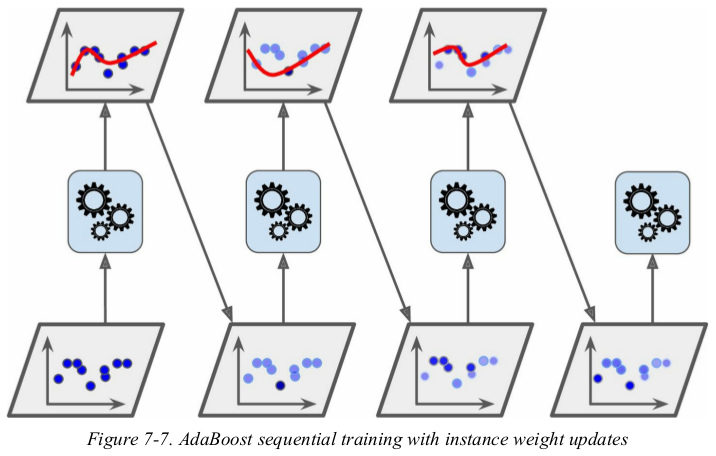

In [14]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth= 1), n_estimators= 200,
                             algorithm= "SAMME.R", learning_rate= 0.3)
adaboost.fit(X_train ,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=200)

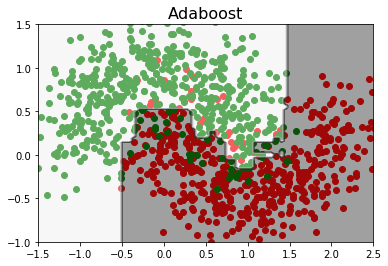

In [15]:
y_pred = adaboost.predict(X_im)

plt.axis([-1.5,2.5, -1, 1.5]); plt.title("Adaboost", fontsize=16)
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
plt.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')
plt.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.binary, alpha=0.4)

#### Each sample weight $w$ is reseted as $\frac{1}{m}$ in the beginning. The error rate appled weight of $jth$ model is like ####
## $r_j = \frac{\sum_{i=1}^mw^{(i)}\;(\text{when}\;\hat{y}_j^{(i)} \neq y^{(i)} )}{\sum_{i=1}^{m}w^{(i)}}$ ##
#### And weight $\alpha_j$ is calculated by under fomula. $\eta$ is hyperparameter(default is 1). As the model is exact, weight is higher. ####
## $\alpha_j = \eta log\frac{1-r_j}{r_j}$ ##
#### Next, adaboost algorithm updates weight of sample using under fomula. ####
### $w^{(i)} =
\begin{cases}
w^{(i)} & \text{if }\hat{y_j}^{(i)} = y^{(i)} \\
w^{(i)}\exp{(\alpha_j)} & \text{if }\hat{y_j}^{(i)} \neq y^{(i)}
\end{cases}$ $(i=1,2,\dots,m)$ ###
#### And then normalize weights of all samples. Finally new model is trained by updated weight and all process is repeated. When adaboost makes prediction, it simply calculate prediction of all model and adds weight $\alpha_j$. A class which has the biggest addition of weights is selected as prediction. ####

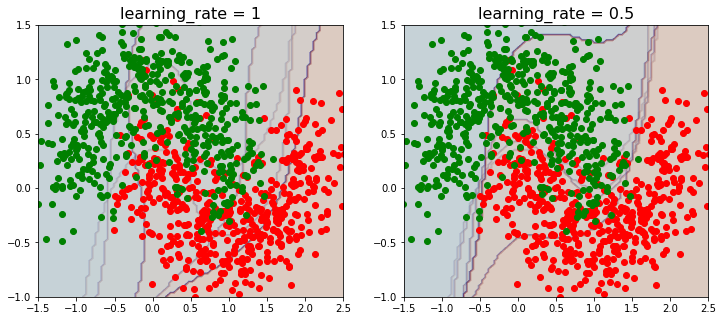

In [16]:
from sklearn.svm import SVC
m = len(X_train)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

for learnrate, ax in zip((1, 0.5), (ax1, ax2)):
    weight = np.ones(m)/m
    for x in range(5):
        svm = SVC(kernel="rbf", C=0.2, gamma=0.6)
        svm.fit(X_train, y_train, sample_weight= weight*m)
        y_pred = svm.predict(X_train)
        rj =  weight[y_pred != y_train].sum()/ weight.sum()
        alpha = learnrate*np.log((1-rj)/rj)
        weight[y_pred != y_train] *= np.exp(alpha)
        weight /= weight.sum()
        
        y_pred1 = svm.predict(X_im)
        ax.axis([-1.5,2.5, -1, 1.5]); ax.set_title("learning_rate = {}".format(learnrate), fontsize=16)
        ax.contourf(x0, x1, y_pred1.reshape(x0.shape), cmap=plt.cm.twilight, alpha=0.3)
    ax.scatter(X[Y==1][:,0],X[Y==1][:,1], c='red')
    ax.scatter(X[Y==0][:,0],X[Y==0][:,1], c='g')

### - GradientBoosting ###
#### Like adaboosting, gradient boosting sequentaily adds model to correct previous error. However, it trains residual error of previous model. ####

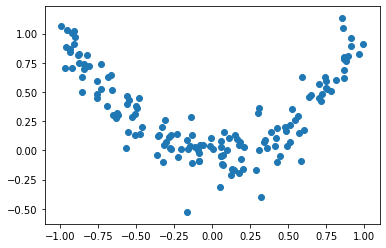

In [17]:
x = np.random.uniform(-1,1,150)
y = x**2 + 0.15*np.random.randn(150)
plt.scatter(x,y)

In [18]:
from sklearn.tree import DecisionTreeRegressor
x_1 = x.reshape(-1,1)
treeg = DecisionTreeRegressor(max_depth=2)
treeg.fit(x_1, y)

DecisionTreeRegressor(max_depth=2)

In [19]:
y2 = y - treeg.predict(x_1)
treeg2 = DecisionTreeRegressor(max_depth=2)
treeg2.fit(x_1, y2)

DecisionTreeRegressor(max_depth=2)

In [20]:
y3 = y2 - treeg2.predict(x_1)
treeg3 = DecisionTreeRegressor(max_depth=2)
treeg3.fit(x_1, y3)

DecisionTreeRegressor(max_depth=2)

Text(0.5, 1.0, 'prediction of ensemble')

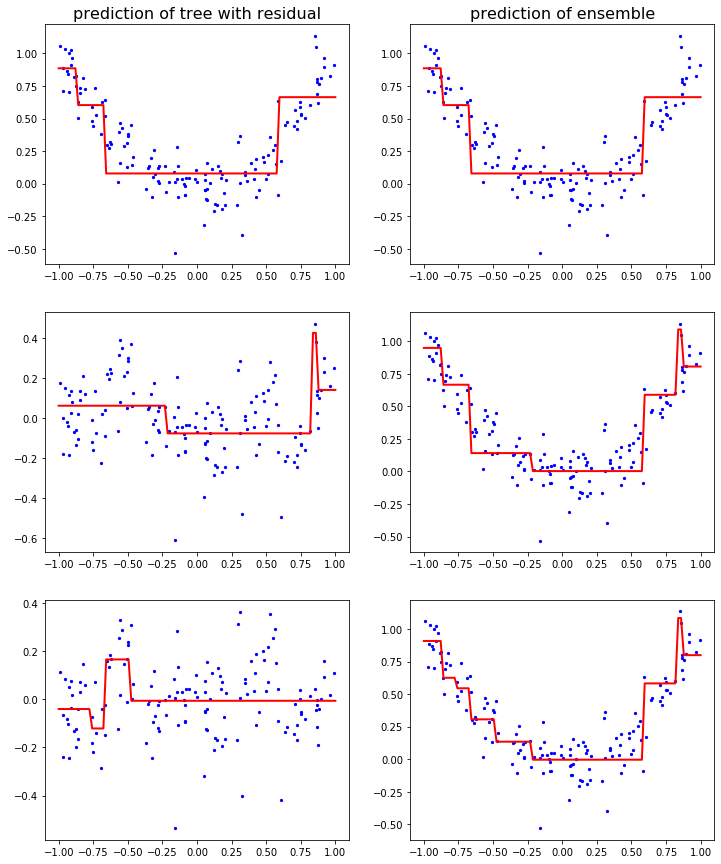

In [21]:
fig, (axes) = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
x_im = np.linspace(-1,1,100)

for axs, ys, model in zip((axes[0][0], axes[1][0], axes[2][0]), (y,y2,y3), (treeg, treeg2, treeg3)):
    axs.scatter(x, ys, c='b', s=5)
    y_pred = model.predict(x_im.reshape(-1,1))
    axs.plot(x_im, y_pred, c='r', linewidth =2)
    
ensem_pred1 = treeg.predict(x_im.reshape(-1,1))
ensem_pred2 = sum(tree.predict(x_im.reshape(-1,1)) for tree in (treeg, treeg2))
ensem_pred3 = sum(tree.predict(x_im.reshape(-1,1)) for tree in (treeg, treeg2, treeg3))

for axs, pred in zip((axes[0][1], axes[1][1], axes[2][1]), (ensem_pred1, ensem_pred2, ensem_pred3)):
    axs.scatter(x, y, c='b', s=5)
    axs.plot(x_im, pred, c='r', linewidth=2)

axes[0][0].set_title("prediction of tree with residual", fontsize=16)
axes[0][1].set_title("prediction of ensemble", fontsize=16)

#### Under code is same with above GBRT ensemble model. ####

Text(0.5, 1.0, 'GBRT')

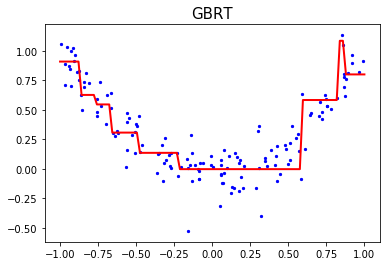

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

def gbrtplot(model):
    model.fit(x_1, y)
    y_pred = model.predict(x_im.reshape(-1,1))
    plt.scatter(x, y, c='b', s=5)
    plt.plot(x_im, y_pred, c='r', linewidth=2)

    
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1)


gbrtplot(gbrt)
plt.title("GBRT", fontsize=15)

#### Learning rate is hyperparameter. If we set it low(like 0.1) we need many trees to make ensemble train trainset, but score of prediction can be better. And of course, we should be careful of overfitting. ####

Text(0.5, 1.0, 'learning_rate=0.1, n_estimators=200')

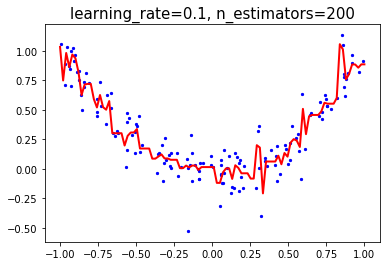

In [23]:
gbrt02 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)

gbrtplot(gbrt02)
plt.title("learning_rate=0.1, n_estimators=200", fontsize=15)

#### To find best number of tree, we can use early stopping. ####

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_val, y_train, y_val = train_test_split(x_1, y)
val_score = []

for estimator in range(1,120):
    gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=estimator)
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_val)
    val_score.append(mean_squared_error(y_pred, y_val))

Text(0.5, 1.0, 'n_estimators=38')

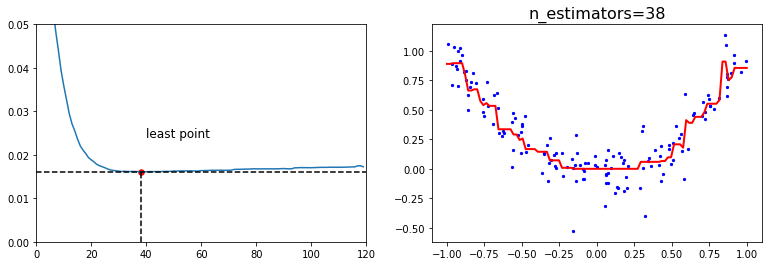

In [32]:
best_esimator = np.argmin(val_score) + 1
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=best_esimator)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,4))

ax1.axis([0,120,0,0.05])
ax1.plot(np.arange(1,120,1), val_score)
ax1.plot([0,120], [val_score[best_esimator-1], val_score[best_esimator-1]], c='black', linestyle='--')
ax1.plot([best_esimator, best_esimator], [0,val_score[best_esimator-1]], c='black', linestyle='--')
ax1.scatter(best_esimator, val_score[best_esimator-1], c='r', s=30)
ax1.text(40, 0.024, "least point", fontsize=12)

gbrt.fit(x_train,y_train)
y_pred = gbrt.predict(x_im.reshape(-1,1))
plt.scatter(x, y, c='b', s=5)
plt.plot(x_im, y_pred, c='r', linewidth=2)

plt.title("n_estimators={}".format(best_esimator), fontsize=16)

#### We can set sample size that each tree trains with **subsample**. This method makes train speed more higher. We say this stochastic gradient boosting. ####
#### XGBoost is famous of optimaized gradient boosting. ####

[0]	validation_0-rmse:0.27833
[1]	validation_0-rmse:0.21419
[2]	validation_0-rmse:0.17350
[3]	validation_0-rmse:0.15407
[4]	validation_0-rmse:0.14276
[5]	validation_0-rmse:0.13914
[6]	validation_0-rmse:0.13825
[7]	validation_0-rmse:0.13793
[8]	validation_0-rmse:0.13806
[9]	validation_0-rmse:0.13948


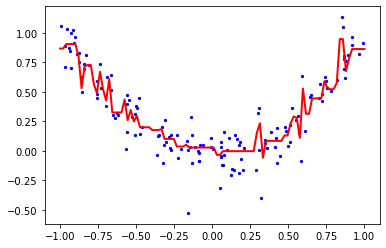

In [35]:
import xgboost


xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=2)
y_pred = xgb.predict(x_im.reshape(-1,1))
plt.scatter(x, y, c='b', s=5)
plt.plot(x_im, y_pred, c='r', linewidth=2)

## 5. Stacking ##
#### Stacking is a method which makes a model that learns predictions of models in ensemble. Each model makes prediction and the last model (called blender) gathers the predictions as input and derives final prediction. ####
#### A general method to train blender is to use hold-out method. First, devide train set in two subsets. the first subset is used for training prediction of first layer. And then make prediction about second subset using models in first layer. We can make new train set with using the original target value. Blender trains the new train set and prediction can be derived. Multilayer stacking is available. In this case, just deviding train set into number of layers should be processed. ####
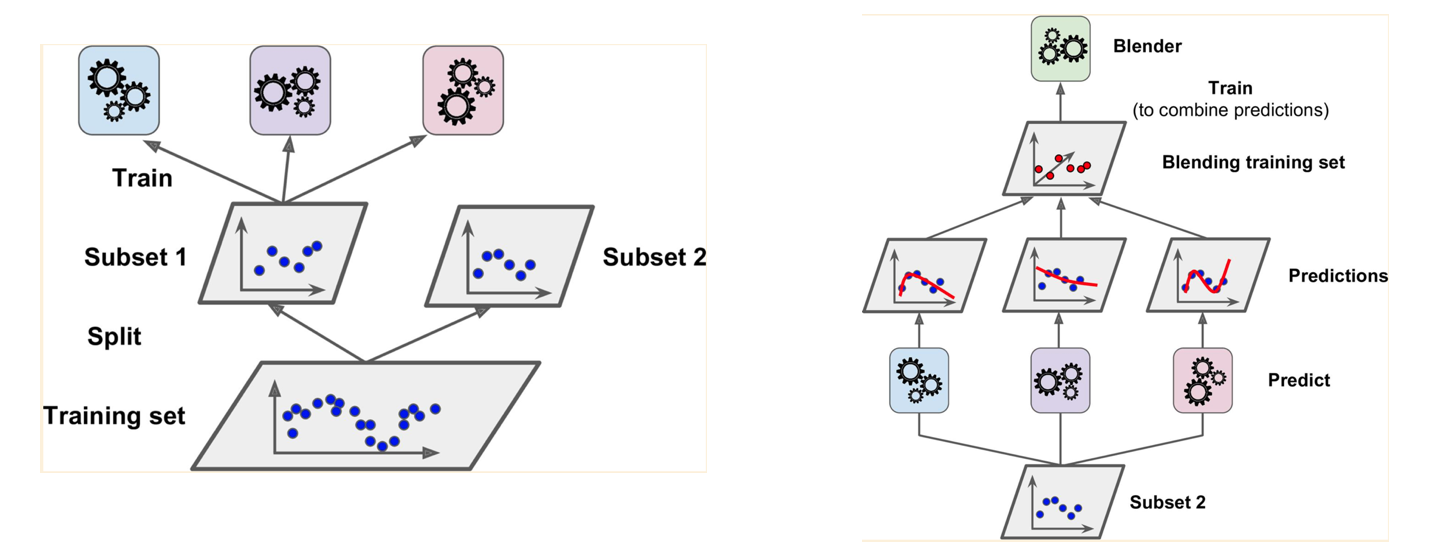